In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_MBS.csv') 

In [5]:
df.head()

,Date,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.350365,0.717929,0.725832,0.630776,0.712547,0.745522,0.677576,0.708116,0.592760,0.694897,0.492488,0.570117,0.253638,0.747463,0.551875,4.0
1,1997-02-28 00:00:00,0.313869,0.637829,0.558983,0.601489,0.639215,0.562434,0.410301,0.594846,0.455540,0.589623,0.389947,0.540783,0.202642,0.541103,0.473883,4.0
2,1997-03-31 00:00:00,0.372263,0.375000,0.589971,0.562439,0.615111,0.556375,0.547829,0.525178,0.408284,0.592410,0.436515,0.586204,0.353999,0.529601,0.467643,4.0
3,1997-04-30 00:00:00,0.335766,0.661608,0.586265,0.667873,0.547397,0.599052,0.451645,0.602666,0.365778,0.632933,0.420977,0.645439,0.352820,0.409844,0.422184,4.0
4,1997-05-31 00:00:00,0.328467,0.562735,0.513109,0.470997,0.240147,0.496839,0.336672,0.507642,0.286514,0.609563,0.413176,0.607589,0.350575,0.398342,0.441813,4.0


In [6]:
df = df.drop(columns=[#"Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.501295,0.493999,0.497352,0.489545,0.495918,0.503700,0.504949,0.512186,0.511790,0.495789,0.445458,0.497647,0.458988,2.55914
std,0.201425,0.207990,0.210104,0.218887,0.209323,0.219842,0.208194,0.221212,0.200958,0.224305,0.213694,0.242868,0.201318,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.343066,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.292076,0.375000,0.326409,2.00000
50%,0.467153,0.511023,0.511976,0.501054,0.512001,0.509064,0.532947,0.510077,0.536752,0.502933,0.461649,0.466678,0.450613,3.00000
75%,0.605839,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.575246,0.625000,0.595845,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               234 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 80th percentile (top 20%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 80th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.80) # every data point over the 80th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.642335766


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.786537,0.471744,0.563012,0.492003,0.603742,0.459947,0.622286,0.469425,0.651437,0.531115,0.513048,0.579608,0.431340,2.866667
std,0.080505,0.260785,0.171678,0.248904,0.201822,0.220604,0.192175,0.249422,0.209254,0.193939,0.231534,0.197280,0.182434,1.078720
min,0.649635,0.000000,0.250650,0.000000,0.000000,0.000000,0.105918,0.000000,0.138405,0.001798,0.000000,0.277909,0.000000,1.000000
25%,0.737226,0.326839,0.446609,0.330348,0.508615,0.355509,0.522681,0.335763,0.528811,0.421366,0.351327,0.440798,0.299990,2.000000
50%,0.773723,0.469370,0.569362,0.528188,0.593746,0.461671,0.615991,0.502573,0.616639,0.532646,0.502321,0.522666,0.390085,3.000000
75%,0.832117,0.613529,0.668012,0.634352,0.687665,0.603851,0.716545,0.584906,0.734765,0.618944,0.737844,0.697395,0.595942,4.000000
max,0.978102,1.000000,0.971814,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.957096,1.000000,0.718504,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 3-mo (Treasury)  45.0  0.471744  0.260785  0.038876   
 2                         combined  90.0  0.629140  0.248754  0.026221   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.393395  0.550093  
 2   0.577040  0.681241  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.3148
 1                              Degrees of freedom =   88.0000
 2                                               t =    7.7372
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.6311
 7                                       Hedge's g =    1.6172
 8                        

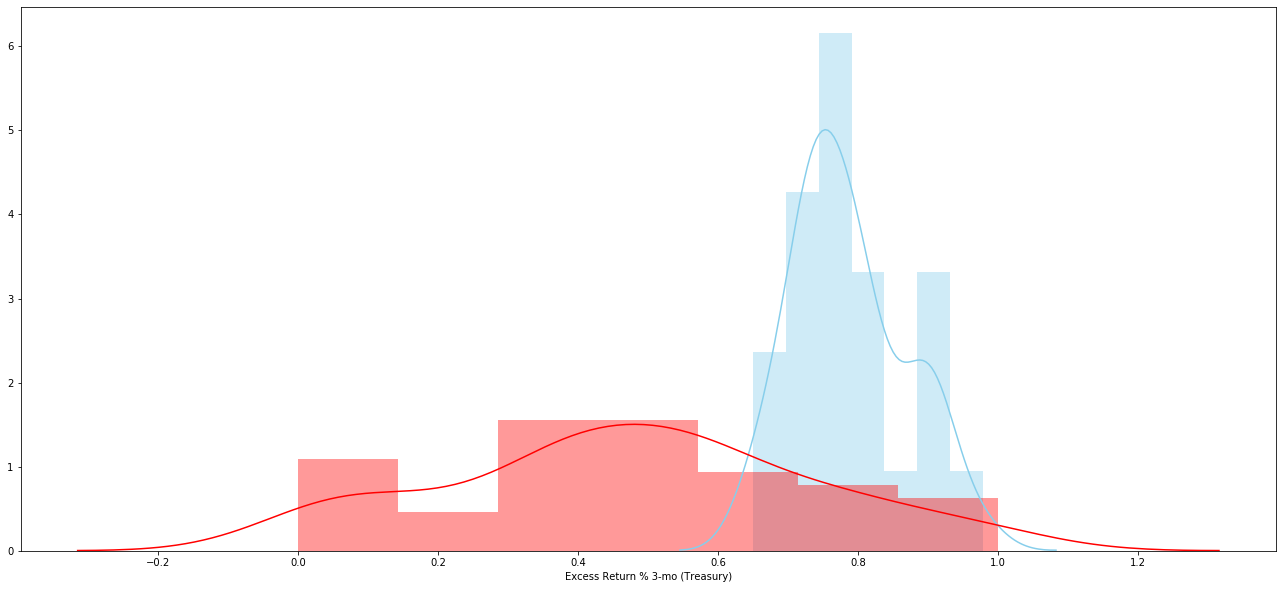

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  45.0  0.786537  0.080505  0.012001   0.762350   
 1  Excess Return % 3-mo (Agg)  45.0  0.563012  0.171678  0.025592   0.511434   
 2                    combined  90.0  0.674774  0.174374  0.018381   0.638252   
 
    Interval  
 0  0.810723  
 1  0.614589  
 2  0.711296  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.2235
 1                             Degrees of freedom =   88.0000
 2                                              t =    7.9078
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.6671
 7                                      Hedge's g =    1.6529
 8                                  Glass's delta =    

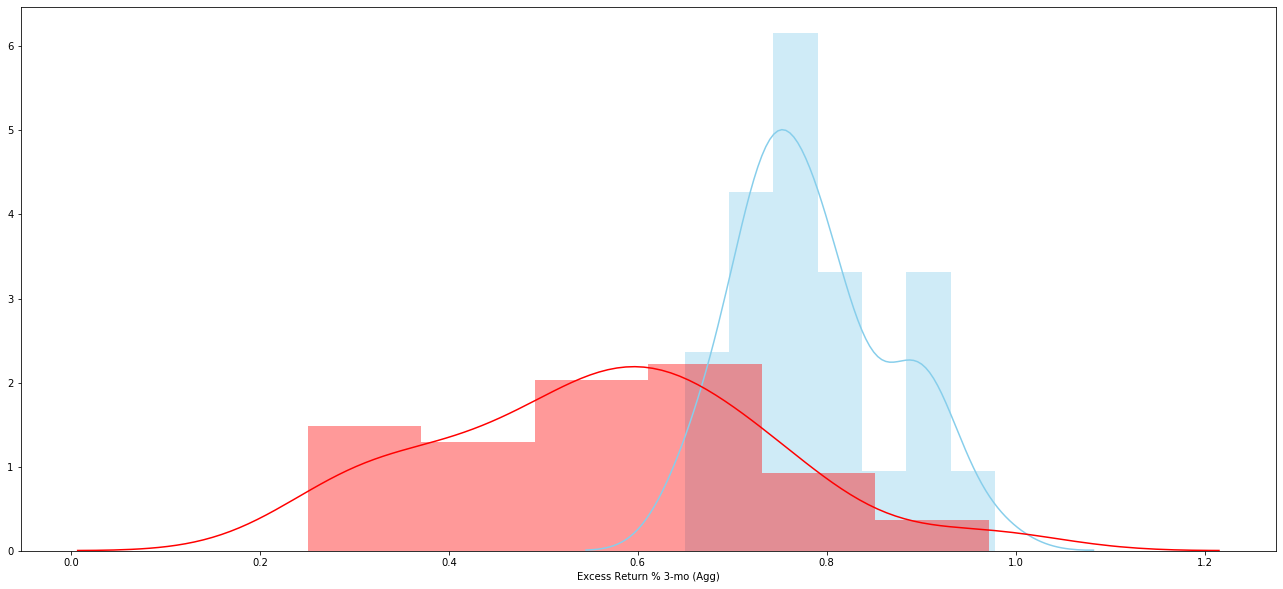

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 6-mo (Treasury)  45.0  0.492003  0.248904  0.037104   
 2                         combined  90.0  0.639270  0.236144  0.024892   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.417224  0.566782  
 2   0.589811  0.688729  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.2945
 1                              Degrees of freedom =   88.0000
 2                                               t =    7.5527
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.5923
 7                                       Hedge's g =    1.5786
 8                        

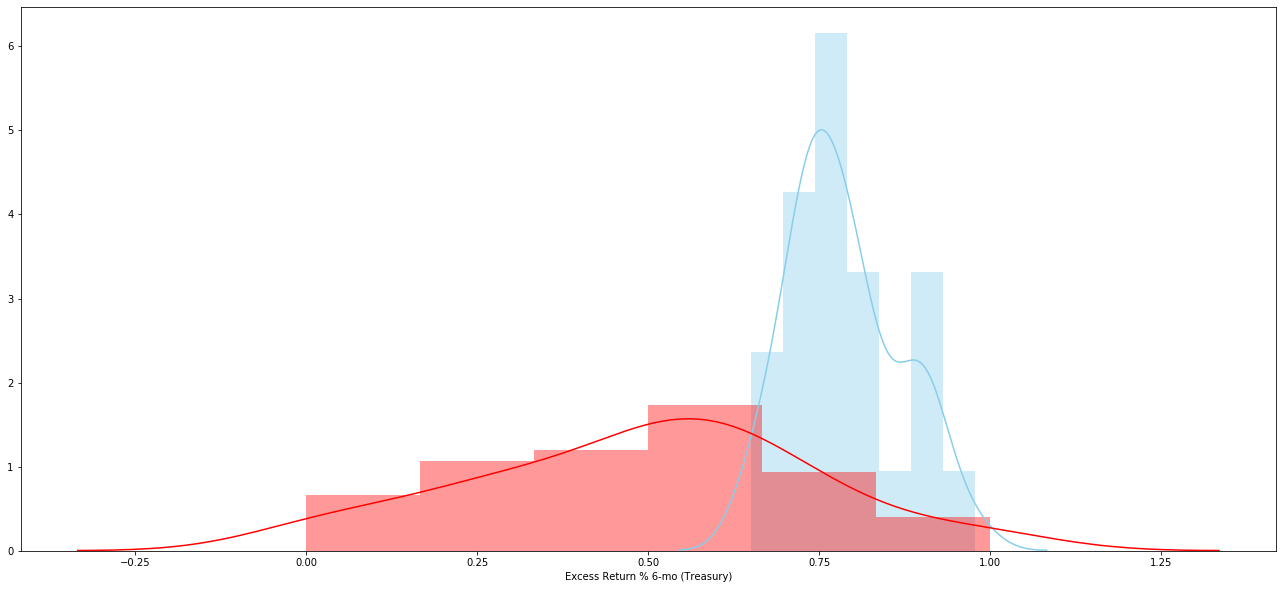

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  45.0  0.786537  0.080505  0.012001   0.762350   
 1  Excess Return % 6-mo (Agg)  45.0  0.603742  0.201822  0.030086   0.543108   
 2                    combined  90.0  0.695139  0.178294  0.018794   0.657796   
 
    Interval  
 0  0.810723  
 1  0.664376  
 2  0.732482  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1828
 1                             Degrees of freedom =   88.0000
 2                                              t =    5.6434
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.1897
 7                                      Hedge's g =    1.1796
 8                                  Glass's delta =    

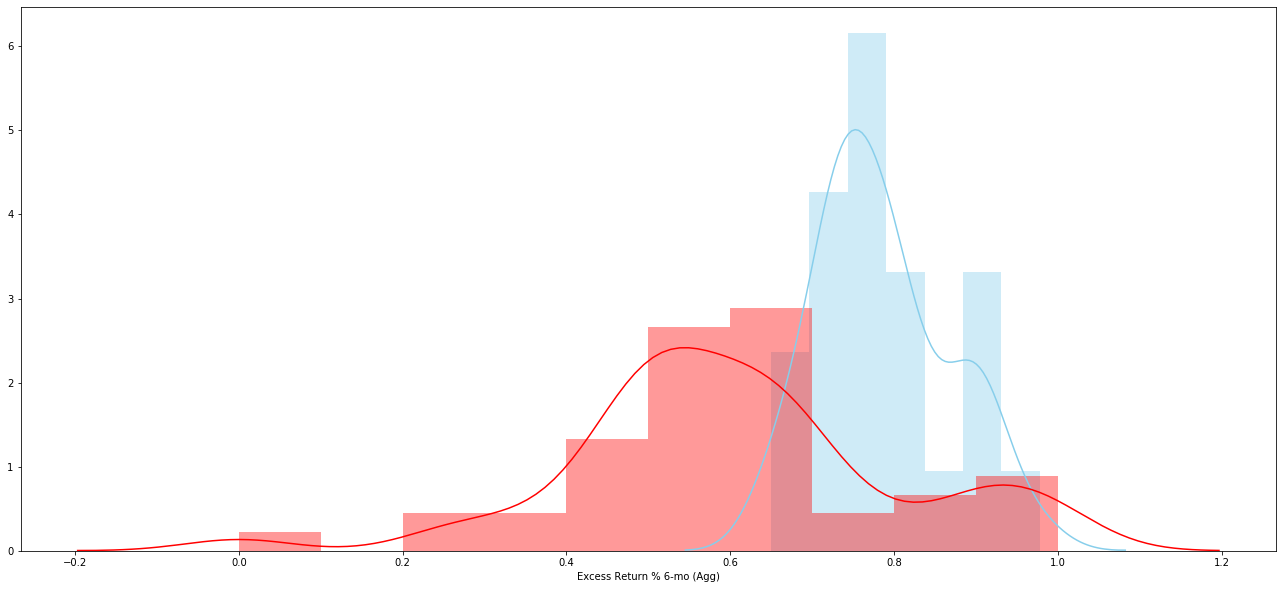

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 9-mo (Treasury)  45.0  0.459947  0.220604  0.032886   
 2                         combined  90.0  0.623242  0.232871  0.024547   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.393670  0.526224  
 2   0.574468  0.672016  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.3266
 1                              Degrees of freedom =   88.0000
 2                                               t =    9.3292
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.9668
 7                                       Hedge's g =    1.9500
 8                        

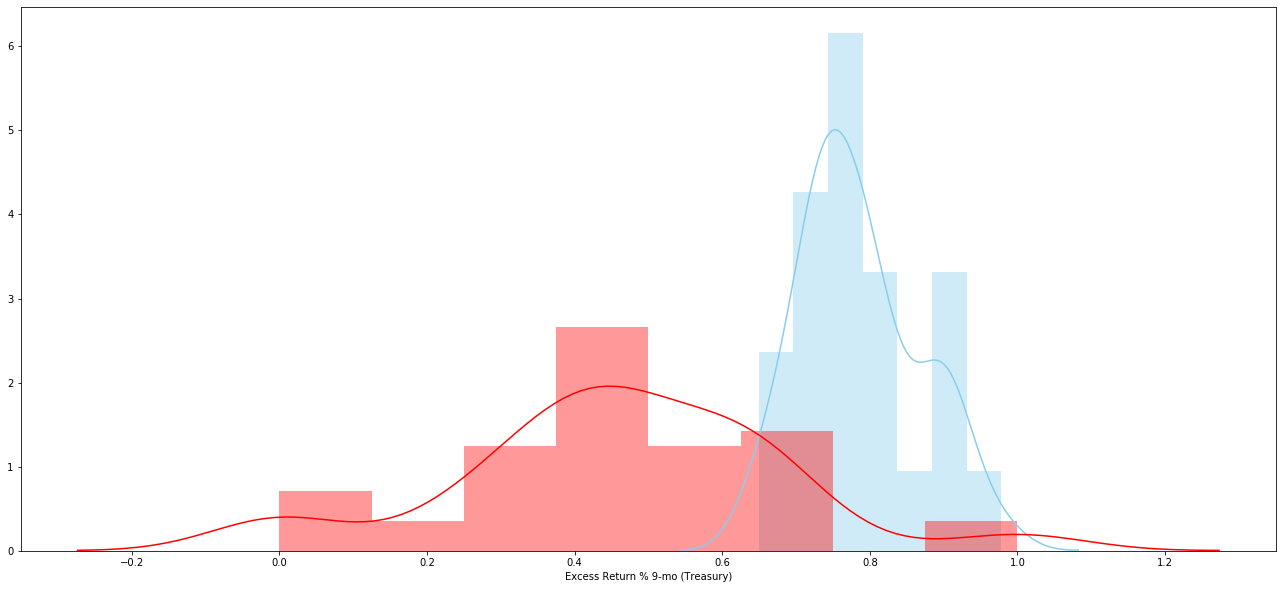

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  45.0  0.786537  0.080505  0.012001   0.762350   
 1  Excess Return % 9-mo (Agg)  45.0  0.622286  0.192175  0.028648   0.564550   
 2                    combined  90.0  0.704411  0.168175  0.017727   0.669188   
 
    Interval  
 0  0.810723  
 1  0.680022  
 2  0.739635  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.1643
 1                             Degrees of freedom =   88.0000
 2                                              t =    5.2882
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.1149
 7                                      Hedge's g =    1.1053
 8                                  Glass's delta =    

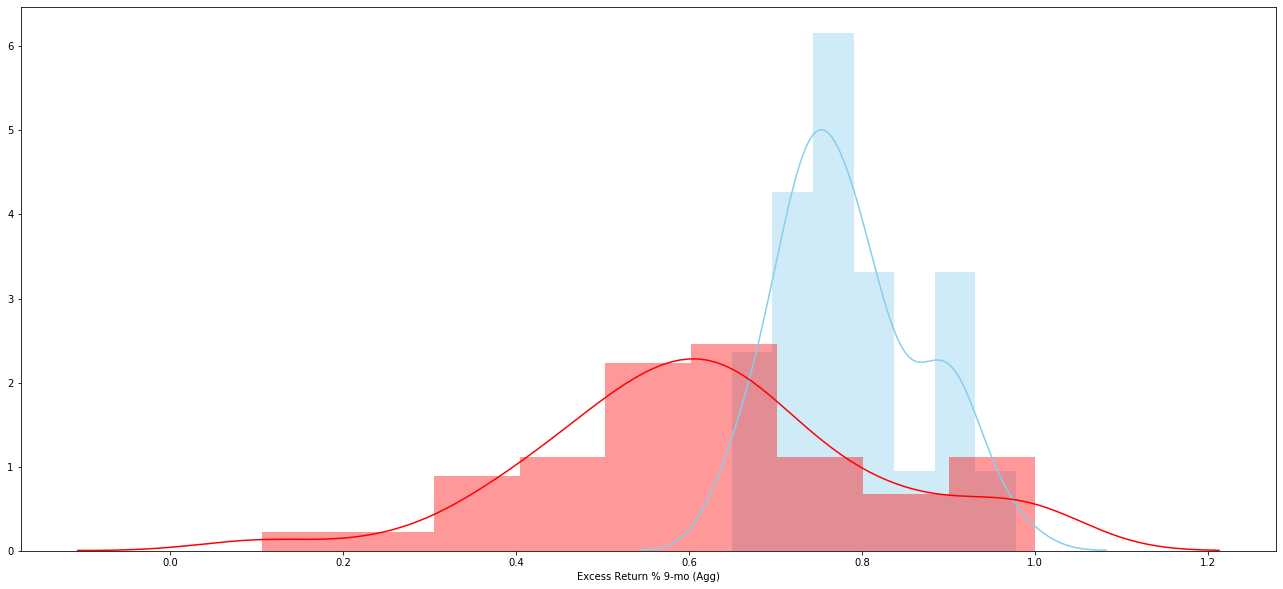

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 12-mo (Treasury)  45.0  0.469425  0.249422  0.037182   
 2                          combined  90.0  0.627981  0.243685  0.025687   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.394491  0.544360  
 2   0.576942  0.679020  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.3171
 1                              Degrees of freedom =   88.0000
 2                                               t =    8.1164
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.7111
 7                                       Hedge's g =    1.6965
 8                    

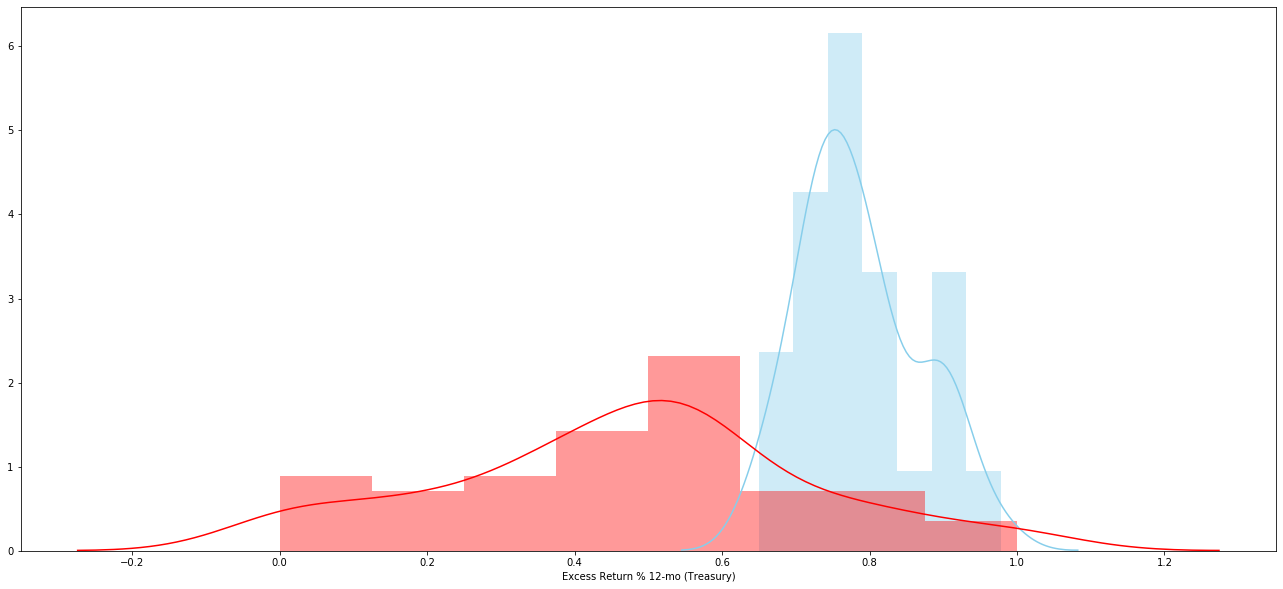

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  45.0  0.786537  0.080505  0.012001   0.762350   
 1  Excess Return % 12-mo (Agg)  45.0  0.651437  0.209254  0.031194   0.588570   
 2                     combined  90.0  0.718987  0.171657  0.018094   0.683034   
 
    Interval  
 0  0.810723  
 1  0.714303  
 2  0.754939  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1351
 1                              Degrees of freedom =   88.0000
 2                                               t =    4.0422
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    0.9999
 5                          Difference > 0 p value =    0.0001
 6                                       Cohen's d =    0.8522
 7                                       Hedge's g =    0.8449
 8                                   Glass

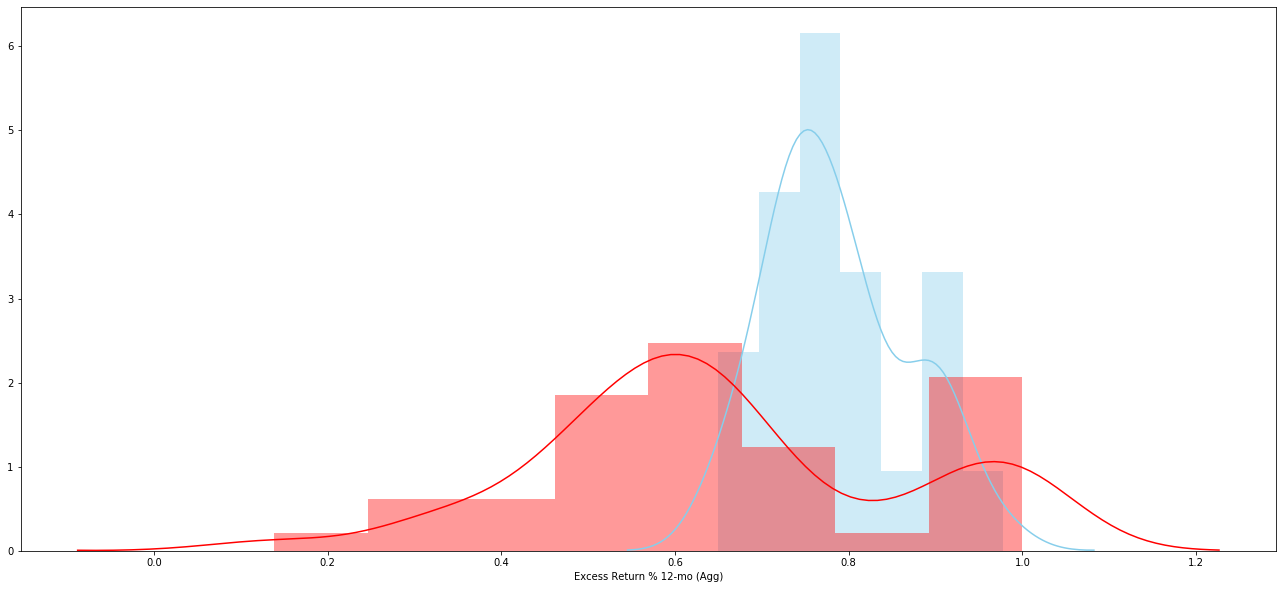

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 24-mo (Treasury)  45.0  0.531115  0.193939  0.028911   
 2                          combined  90.0  0.658826  0.195684  0.020627   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.472849  0.589381  
 2   0.617841  0.699811  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.2554
 1                              Degrees of freedom =   88.0000
 2                                               t =    8.1598
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.7202
 7                                       Hedge's g =    1.7055
 8                    

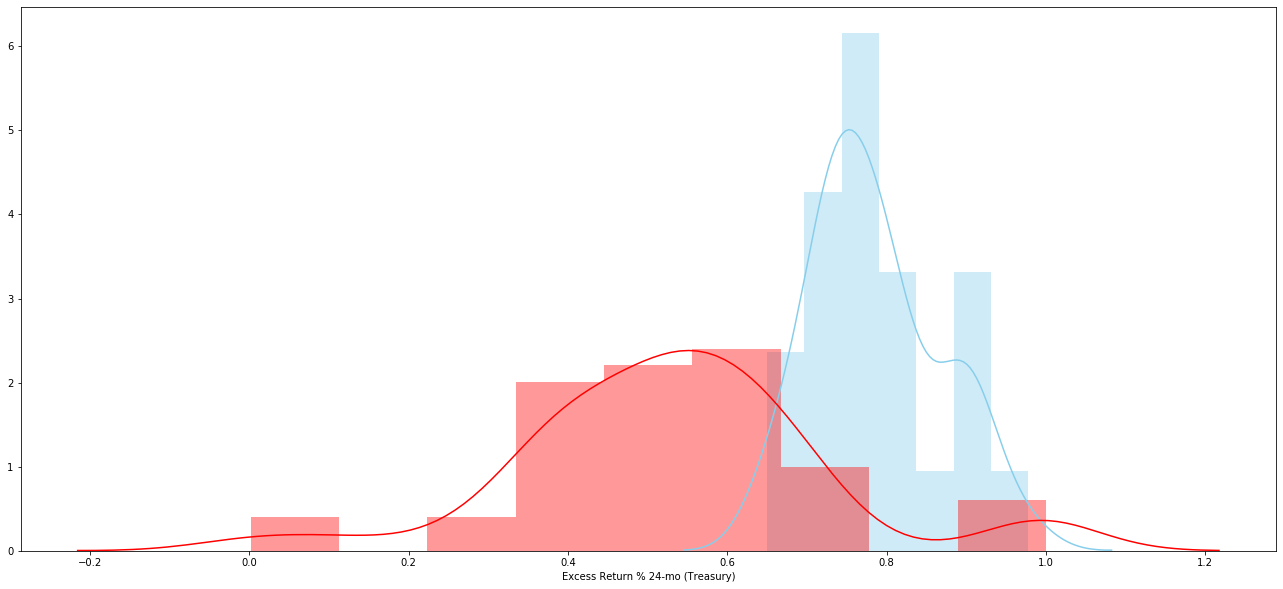

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  45.0  0.786537  0.080505  0.012001   0.762350   
 1  Excess Return % 24-mo (Agg)  45.0  0.513048  0.231534  0.034515   0.443487   
 2                     combined  90.0  0.649792  0.220490  0.023242   0.603612   
 
    Interval  
 0  0.810723  
 1  0.582608  
 2  0.695973  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.2735
 1                              Degrees of freedom =   88.0000
 2                                               t =    7.4843
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.5778
 7                                       Hedge's g =    1.5643
 8                                   Glass

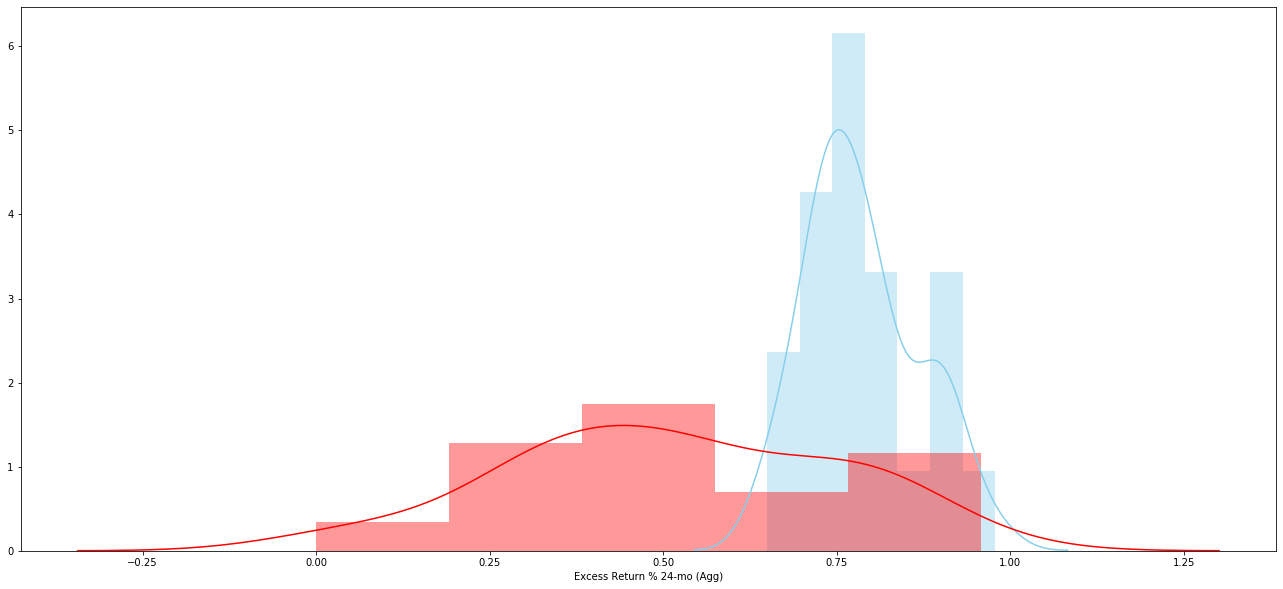

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 36-mo (Treasury)  45.0  0.579608  0.197280  0.029409   
 2                          combined  90.0  0.683073  0.182402  0.019227   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.520339  0.638878  
 2   0.644869  0.721276  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.2069
 1                              Degrees of freedom =   88.0000
 2                                               t =    6.5147
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.3734
 7                                       Hedge's g =    1.3617
 8                    

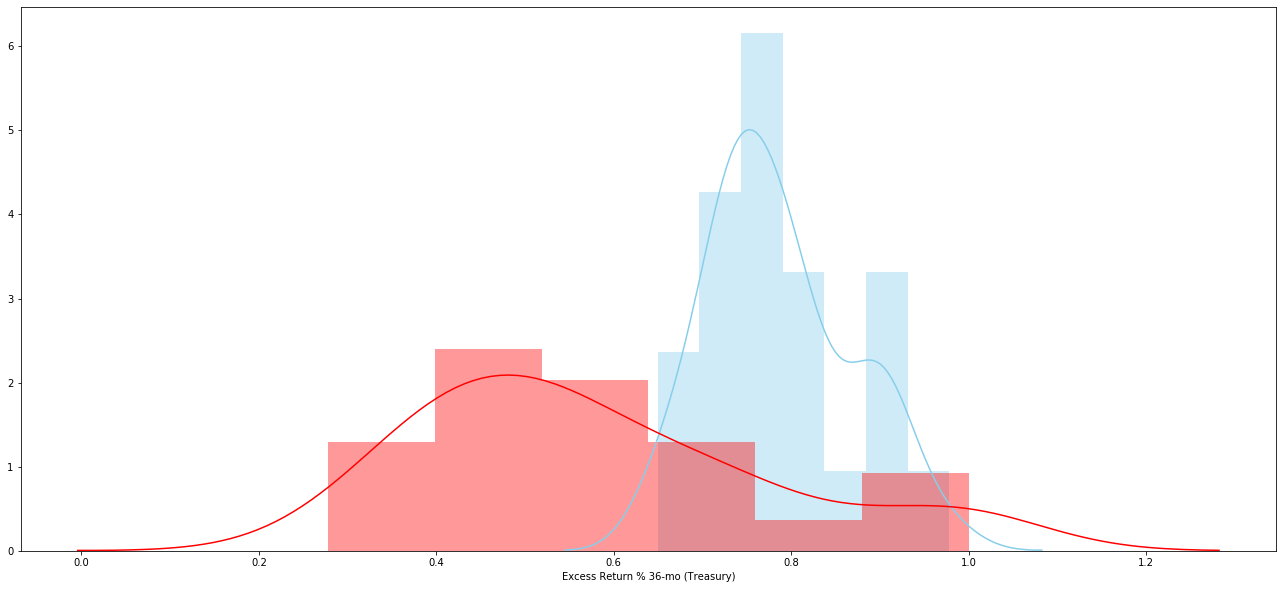

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  45.0  0.786537  0.080505  0.012001   0.762350   
 1  Excess Return % 36-mo (Agg)  45.0  0.431340  0.182434  0.027196   0.376530   
 2                     combined  90.0  0.608938  0.227055  0.023934   0.561383   
 
    Interval  
 0  0.810723  
 1  0.486149  
 2  0.656494  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.3552
 1                              Degrees of freedom =   88.0000
 2                                               t =   11.9491
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    2.5191
 7                                       Hedge's g =    2.4976
 8                                   Glass

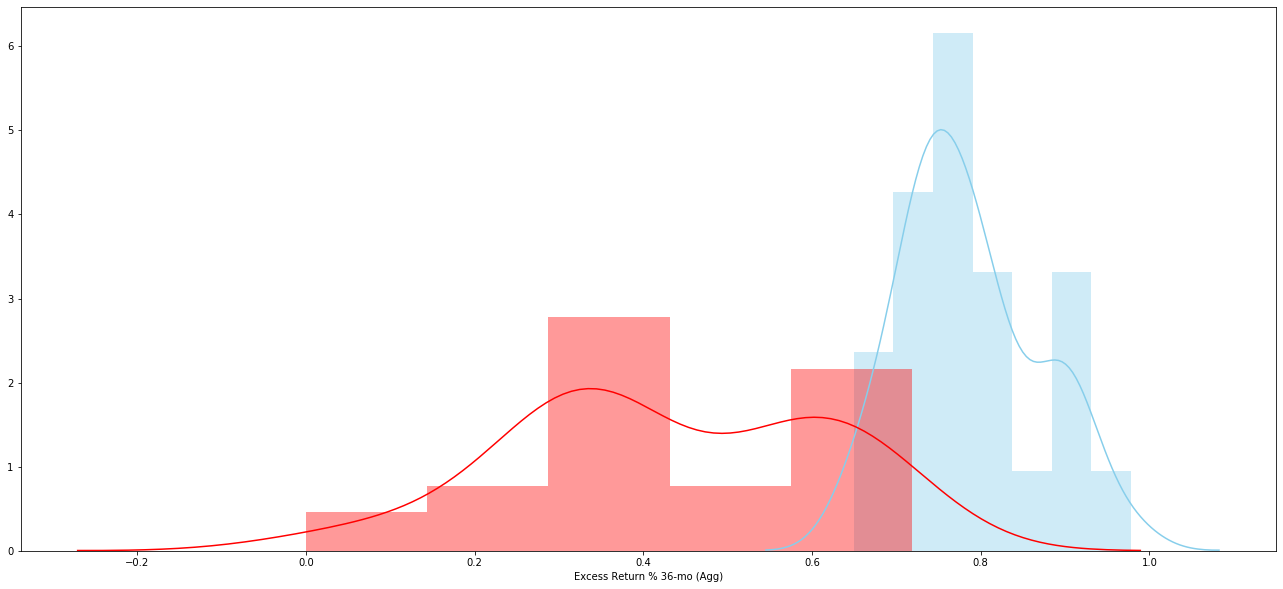

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_MBS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,279.000000,278.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.501295,0.491995,0.494670,0.493999,0.497352,0.489545,0.495918,0.503700,0.504949,0.512186,0.511790,0.495789,0.445458,0.497647,0.458988,2.55914
std,0.201425,0.212702,0.222768,0.207990,0.210104,0.218887,0.209323,0.219842,0.208194,0.221212,0.200958,0.224305,0.213694,0.242868,0.201318,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.343066,0.375000,0.374848,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.292076,0.375000,0.326409,2.00000
50%,0.467153,0.513924,0.509160,0.511023,0.511976,0.501054,0.512001,0.509064,0.532947,0.510077,0.536752,0.502933,0.461649,0.466678,0.450613,3.00000
75%,0.605839,0.625000,0.620595,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.575246,0.625000,0.595845,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 3-mo (Treasury)  278.0  0.493999  0.207990  0.012474   
 2                         combined  323.0  0.534755  0.219985  0.012240   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.469442  0.518556  
 2   0.510674  0.558836  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2925
 1                              Degrees of freedom =   321.0000
 2                                               t =     9.3126
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4964
 7                                       Hedge's g =     1.4929
 8           

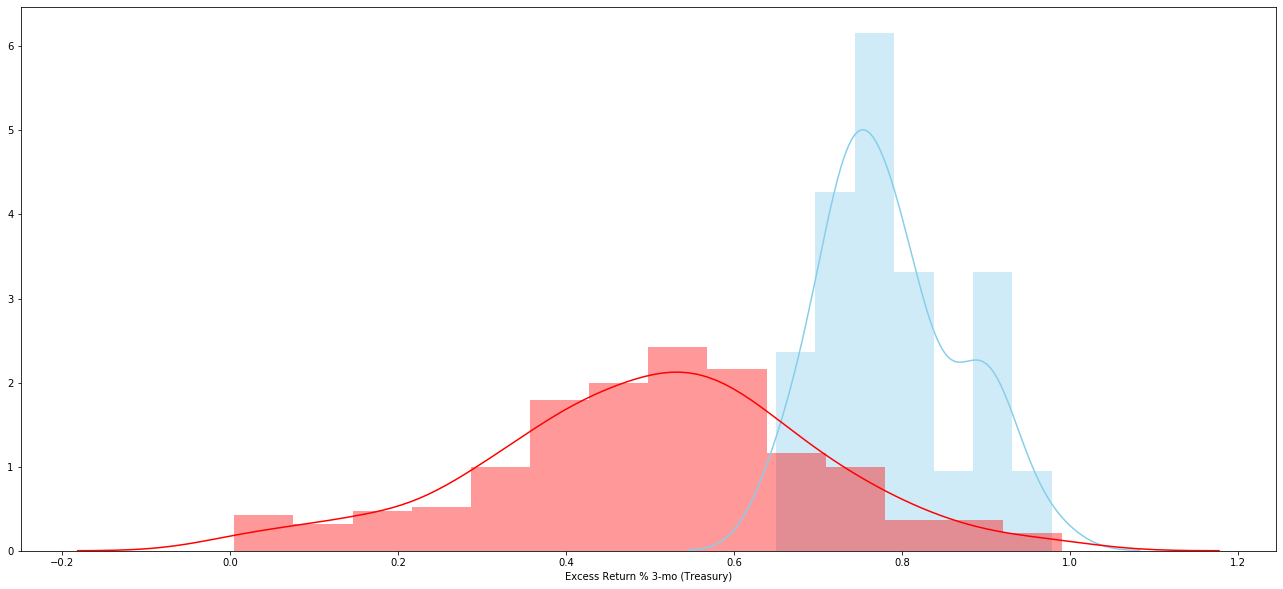

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   45.0  0.786537  0.080505  0.012001   0.762350   
 1  Excess Return % 3-mo (Agg)  278.0  0.497352  0.210104  0.012601   0.472546   
 2                    combined  323.0  0.537641  0.221177  0.012307   0.513430   
 
    Interval  
 0  0.810723  
 1  0.522159  
 2  0.561853  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2892
 1                             Degrees of freedom =   321.0000
 2                                              t =     9.1154
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.4647
 7                                      Hedge's g =     1.4613
 8                                  Glass'

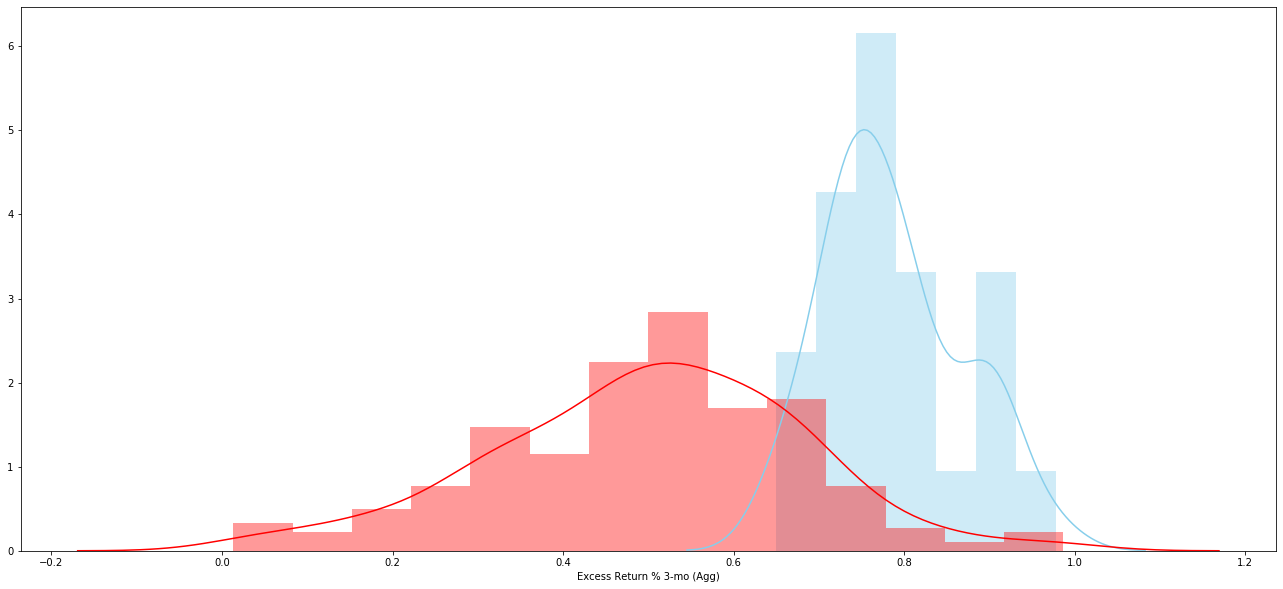

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 6-mo (Treasury)  275.0  0.489545  0.218887  0.013199   
 2                         combined  320.0  0.531309  0.229651  0.012838   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.463560  0.515530  
 2   0.506052  0.556567  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2970
 1                              Degrees of freedom =   318.0000
 2                                               t =     8.9928
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4461
 7                                       Hedge's g =     1.4427
 8           

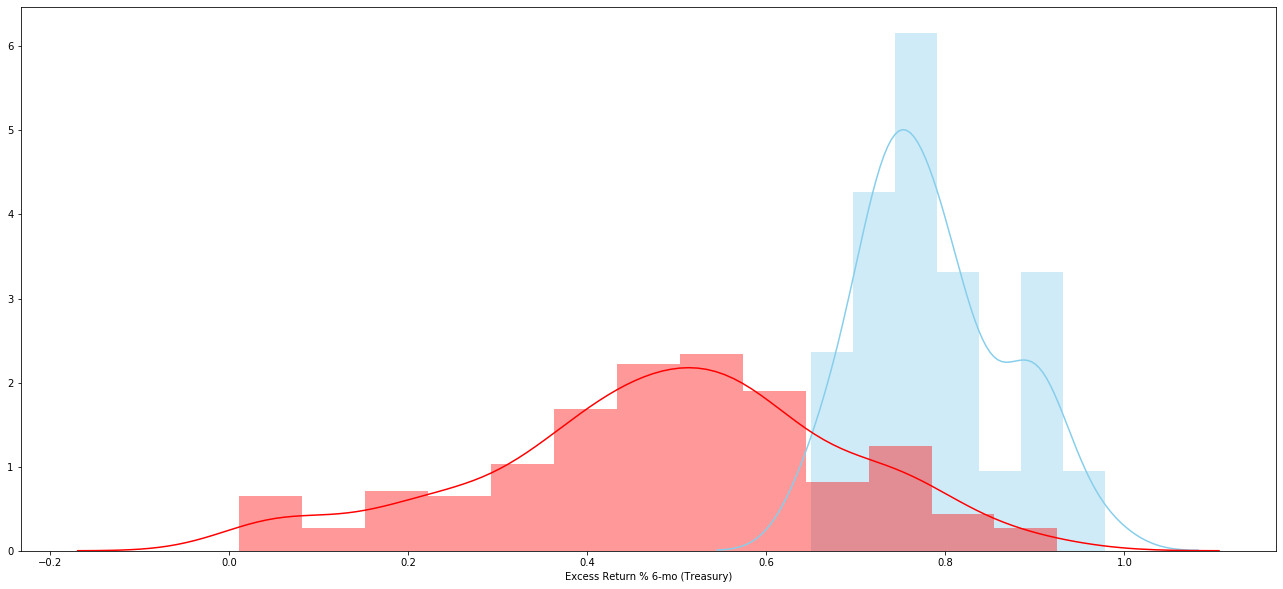

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   45.0  0.786537  0.080505  0.012001   0.762350   
 1  Excess Return % 6-mo (Agg)  275.0  0.495918  0.209323  0.012623   0.471068   
 2                    combined  320.0  0.536786  0.220835  0.012345   0.512498   
 
    Interval  
 0  0.810723  
 1  0.520768  
 2  0.561074  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2906
 1                             Degrees of freedom =   318.0000
 2                                              t =     9.1927
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.4782
 7                                      Hedge's g =     1.4748
 8                                  Glass'

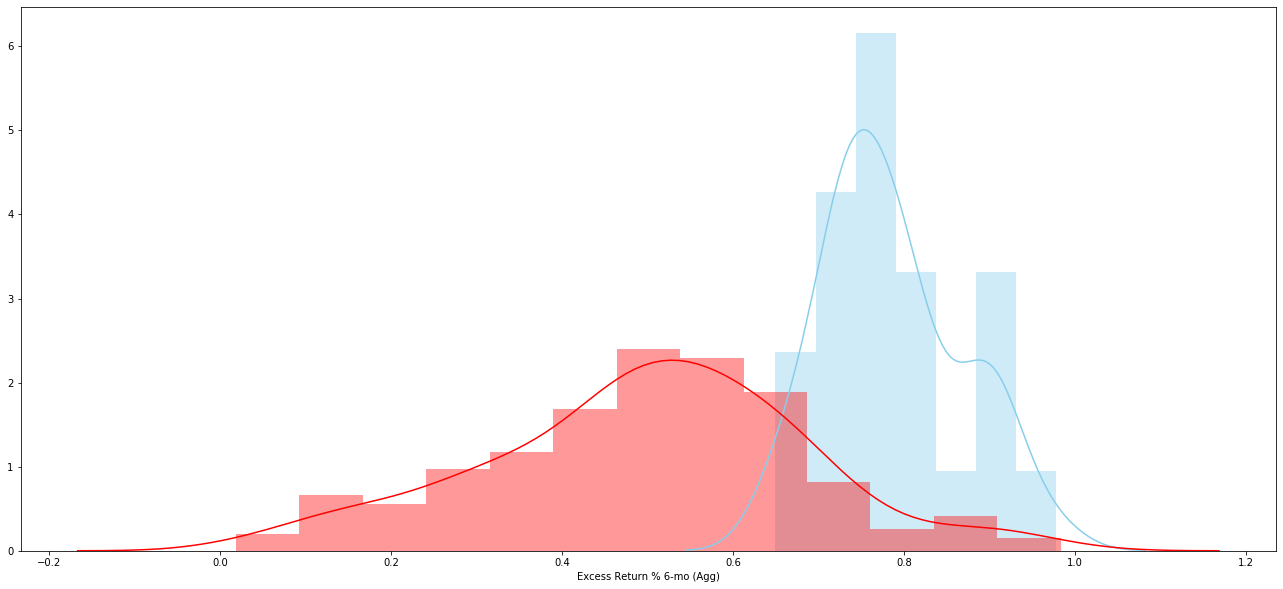

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 9-mo (Treasury)  272.0  0.503700  0.219842  0.013330   
 2                         combined  317.0  0.543850  0.228309  0.012823   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.477457  0.529943  
 2   0.518621  0.569080  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2828
 1                              Degrees of freedom =   315.0000
 2                                               t =     8.5267
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3722
 7                                       Hedge's g =     1.3689
 8           

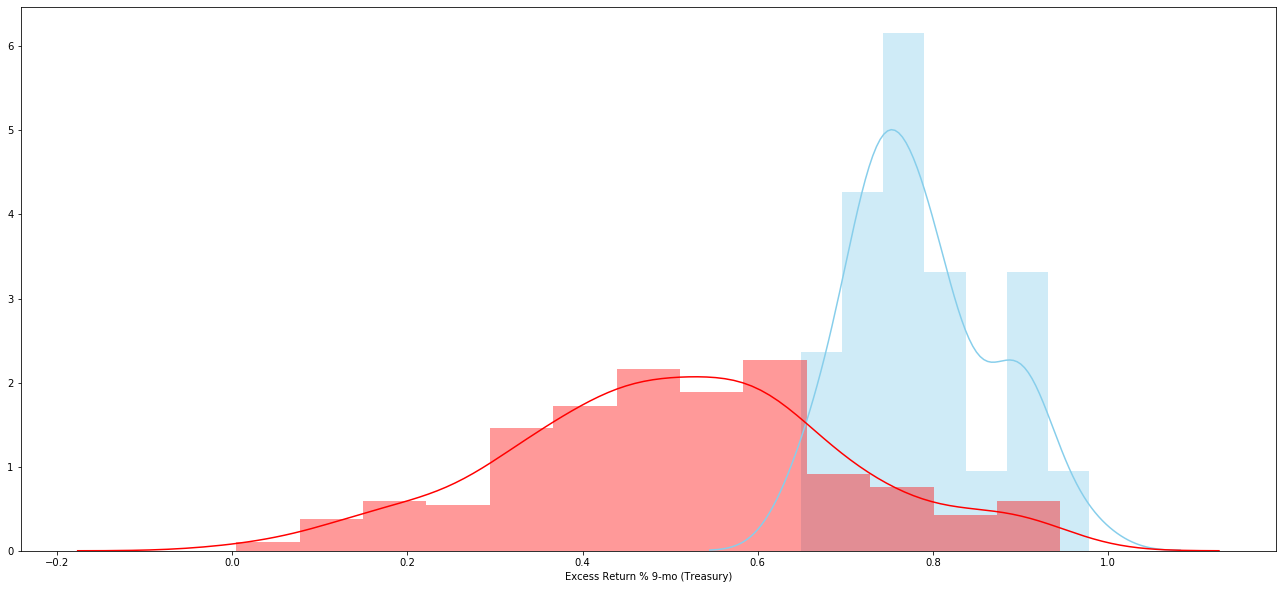

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   45.0  0.786537  0.080505  0.012001   0.762350   
 1  Excess Return % 9-mo (Agg)  272.0  0.504949  0.208194  0.012624   0.480096   
 2                    combined  317.0  0.544922  0.218548  0.012275   0.520771   
 
    Interval  
 0  0.810723  
 1  0.529802  
 2  0.569073  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2816
 1                             Degrees of freedom =   315.0000
 2                                              t =     8.9530
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.4408
 7                                      Hedge's g =     1.4374
 8                                  Glass'

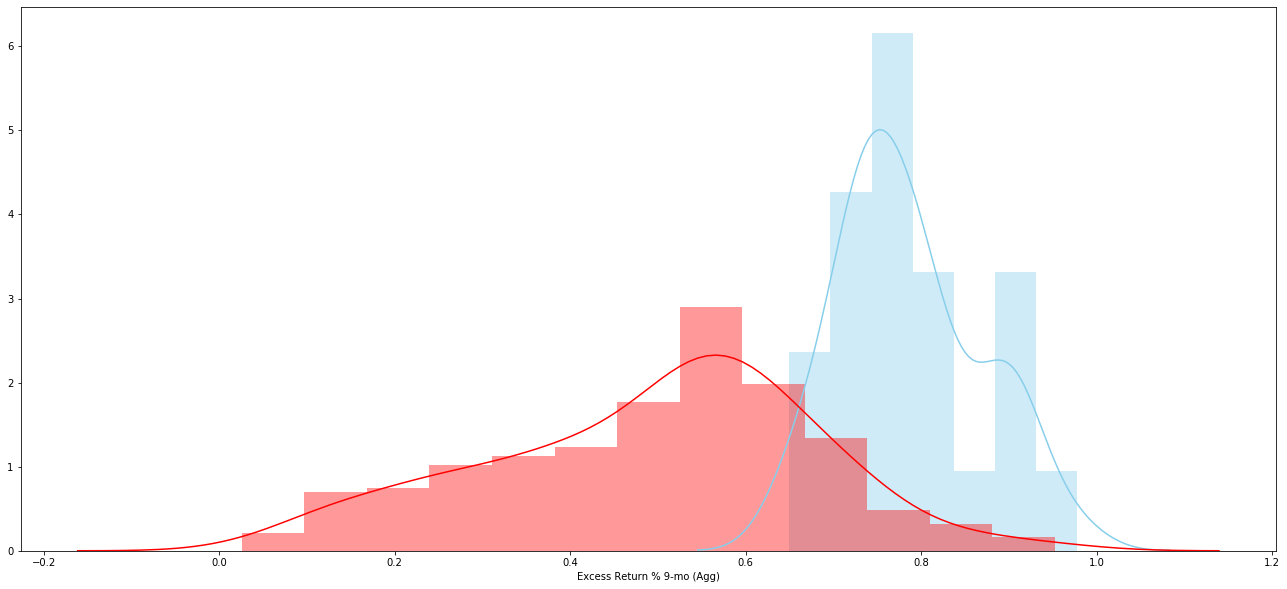

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 12-mo (Treasury)  269.0  0.512186  0.221212  0.013488   
 2                          combined  314.0  0.551504  0.228212  0.012879   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.485631  0.538741  
 2   0.526164  0.576844  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2744
 1                              Degrees of freedom =   312.0000
 2                                               t =     8.2197
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3238
 7                                       Hedge's g =     1.3207
 8       

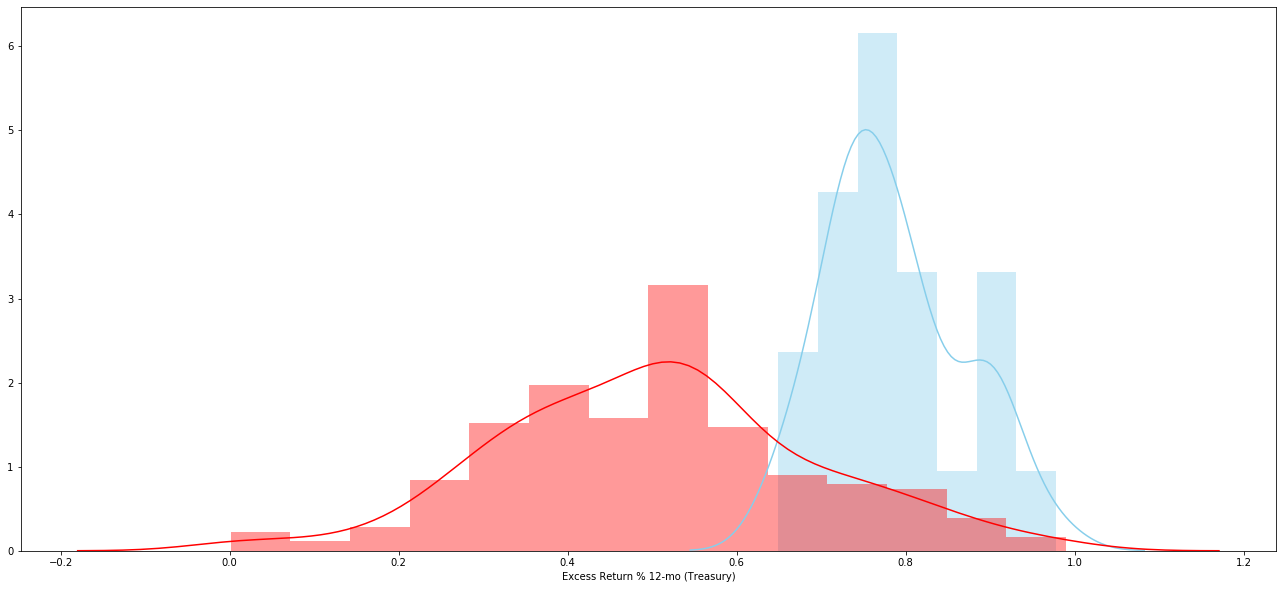

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 12-mo (Agg)  269.0  0.511790  0.200958  0.012253   
 2                     combined  314.0  0.551165  0.211628  0.011943   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.487666  0.535914  
 2   0.527666  0.574663  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2747
 1                              Degrees of freedom =   312.0000
 2                                               t =     9.0408
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4561
 7                                       Hedge's g =     1.4526
 8                           

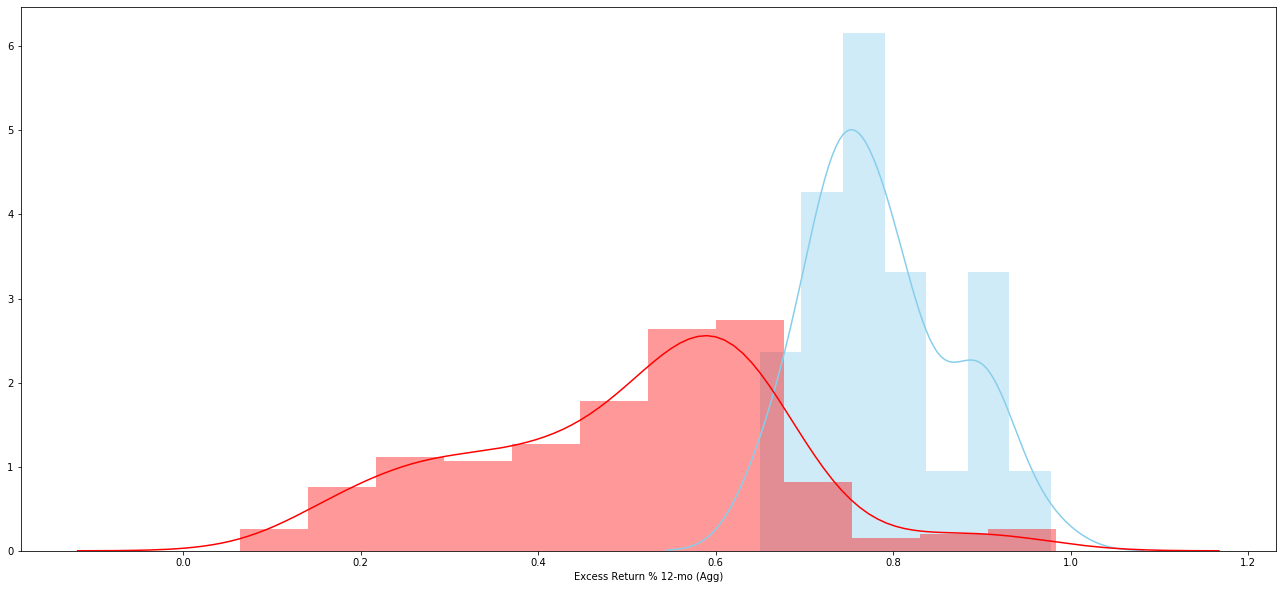

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 24-mo (Treasury)  257.0  0.495789  0.224305  0.013992   
 2                          combined  302.0  0.539112  0.233438  0.013433   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.468235  0.523342  
 2   0.512678  0.565546  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2907
 1                              Degrees of freedom =   300.0000
 2                                               t =     8.5888
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3879
 7                                       Hedge's g =     1.3844
 8       

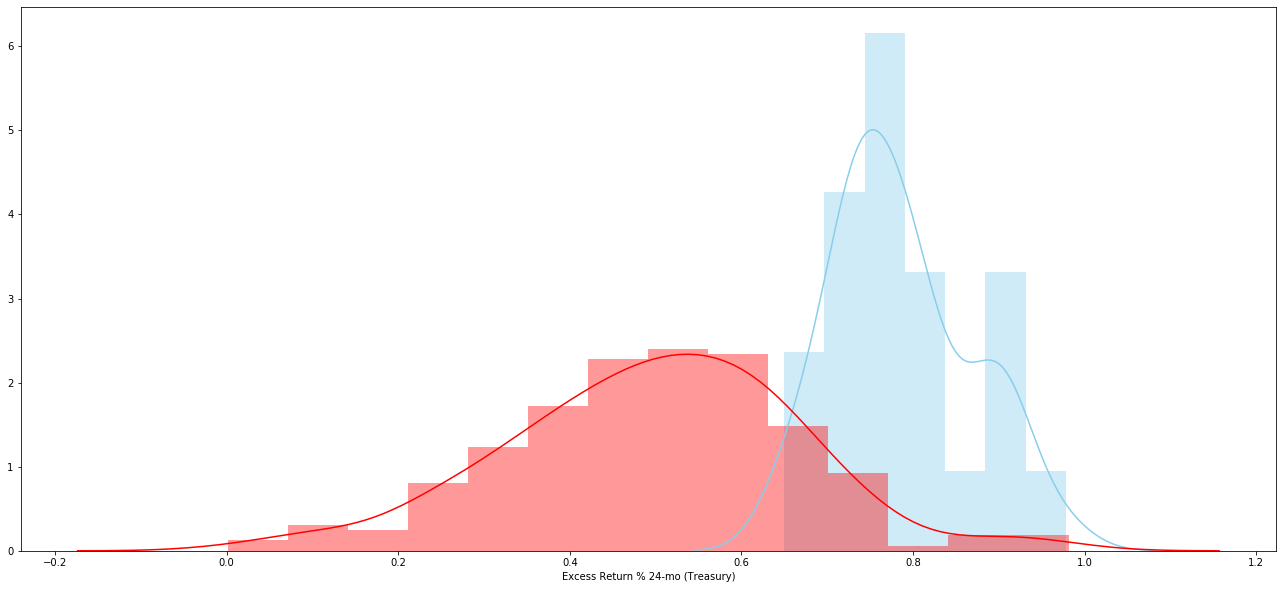

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 24-mo (Agg)  257.0  0.445458  0.213694  0.013330   
 2                     combined  302.0  0.496281  0.233637  0.013444   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.419208  0.471708  
 2   0.469825  0.522738  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.3411
 1                              Degrees of freedom =   300.0000
 2                                               t =    10.5643
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.7071
 7                                       Hedge's g =     1.7029
 8                           

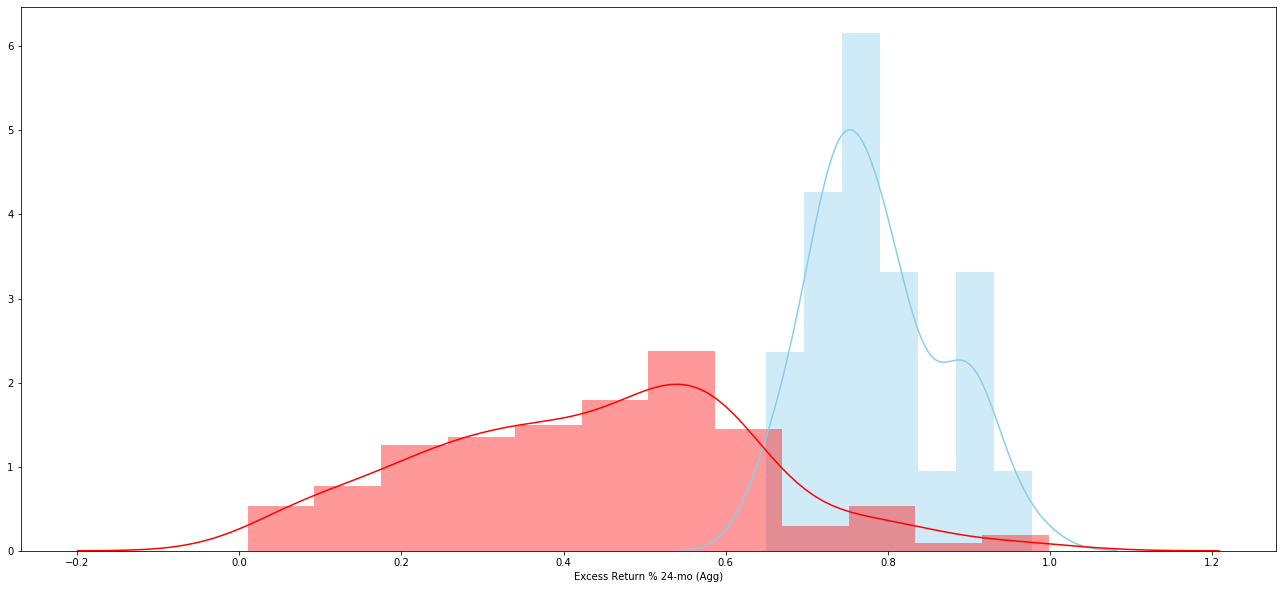

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 36-mo (Treasury)  245.0  0.497647  0.242868  0.015516   
 2                          combined  290.0  0.542475  0.248527  0.014594   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.467084  0.528210  
 2   0.513751  0.571199  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2889
 1                              Degrees of freedom =   288.0000
 2                                               t =     7.8903
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2797
 7                                       Hedge's g =     1.2763
 8       

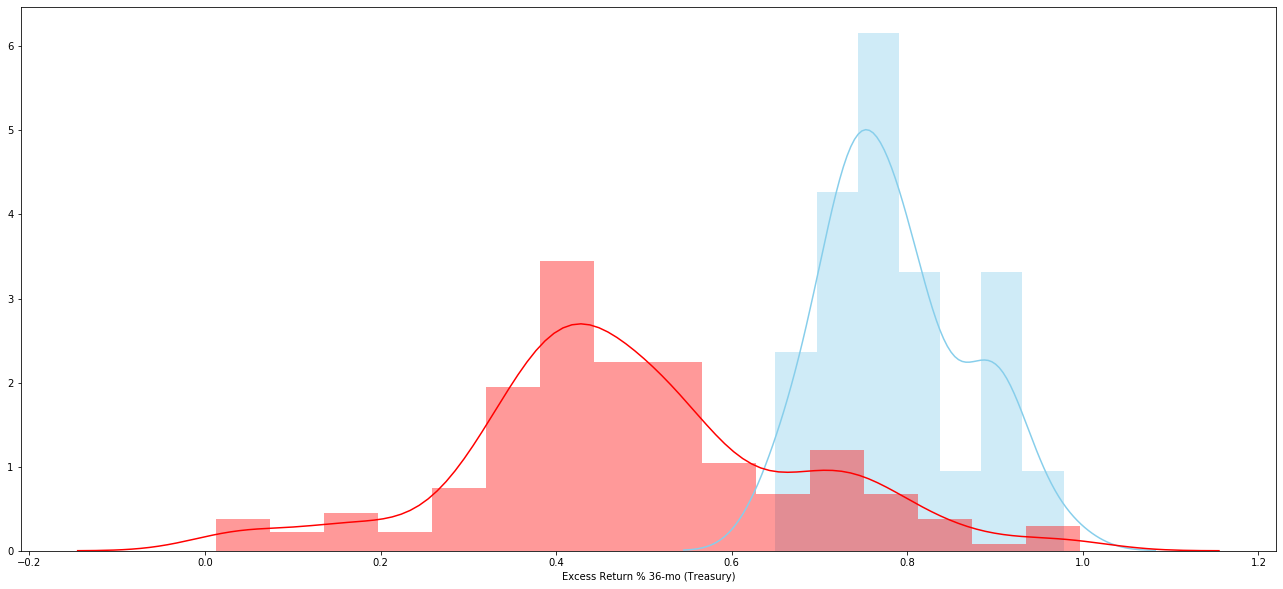

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   45.0  0.786537  0.080505  0.012001   
 1  Excess Return % 36-mo (Agg)  245.0  0.458988  0.201318  0.012862   
 2                     combined  290.0  0.509815  0.222078  0.013041   
 
    95% Conf.  Interval  
 0   0.762350  0.810723  
 1   0.433654  0.484323  
 2   0.484148  0.535482  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.3275
 1                              Degrees of freedom =   288.0000
 2                                               t =    10.7451
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.7427
 7                                       Hedge's g =     1.7382
 8                           

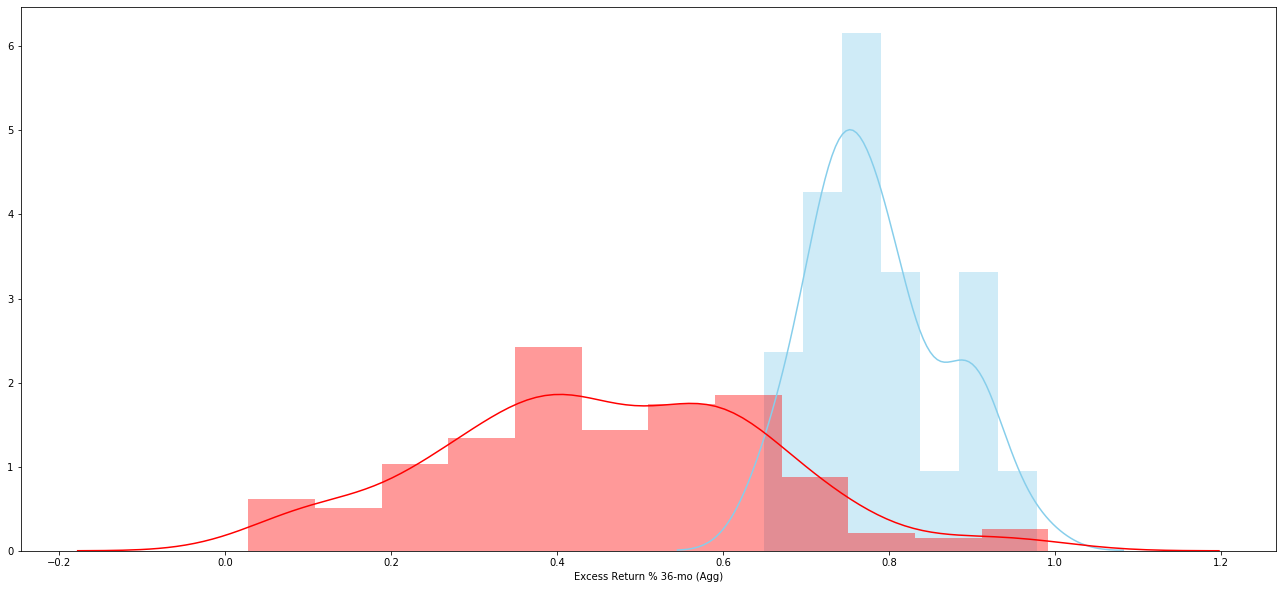

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")